In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from bs4 import BeautifulSoup as bs
import requests
import os
import re
import glob

from datetime import datetime
import dataframe_image as dfi
from statsmodels.tsa.seasonal import seasonal_decompose
import time

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

In [2]:
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4"

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4


In [3]:
# function to download all listings data
def get_listings_munich_timeseries():
    """Function scraping all links to listings.csv files available on insideairbnb.com
    website, and saving downloaded files in a /data/raw-data folder.
    The files are named after their collection date (YYYY-MM.csv)."""
    soup = bs(requests.get('http://insideairbnb.com/get-the-data.html').content,'lxml')
    link_lst = [i['href'] for i in soup.select("td:contains('Munich')+td>a[onclick*=listings]")]
    subfolder_names = ['raw-data']
    for subfolder_name in subfolder_names:
        os.makedirs(os.path.join('data5',subfolder_name))
    for link in link_lst:
        file = pd.read_csv(link)
        date = re.findall(r'20\d{2}-\d{2}',link)[0]
        file.to_csv(f'data5/raw-data/munich_{date}.csv',index=False)
get_listings_munich_timeseries()

In [4]:
# pull in detailed_listings
raw_df_munich = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/munich/munich_detailed.csv')

print(f"The detailed listings dataset contains {len(raw_df_munich)} AirBnb listings.")
#print(f"The most recent listings dataset contains {len(munich_raw_df_11_4_2021)} Airbnb listings.")


The detailed listings dataset contains 4914 AirBnb listings.


In [5]:
munich_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/munich/munich_2020-12.csv')
munich_raw_df_12_12_2020.shape





(4815, 16)

In [6]:
# use magic commands 'cd' to change directory
# use glob to locate all files for munich
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1"
files_munich = glob.glob('munich/**.csv')
files_munich

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1


['munich/Munich_2021-10.csv',
 'munich/Munich_2021-04.csv',
 'munich/Munich_2021-07.csv',
 'munich/Munich_2021-06.csv',
 'munich/Munich_2021-02.csv',
 'munich/Munich_2021-03.csv',
 'munich/Munich_2021-01.csv',
 'munich/Munich_2021-08.csv',
 'munich/Munich_2021-09.csv',
 'munich/Munich_2020-12.csv',
 'munich/Munich_2020-11.csv']

In [7]:
# create individual dataframes for each file
# summarize each file (# of listings; avg price in euro)

munich_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/munich/munich_2020-12.csv')
print(f"The 12_12_2020 dataset contains {len(munich_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(munich_raw_df_12_12_2020['price'].mean(),2)}.")

munich_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/munich/munich_2021-01.csv')
print(f"The 1_9_2021 dataset contains {len(munich_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(munich_raw_df_1_9_2021['price'].mean(),2)}.")

munich_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/munich/munich_2021-02.csv')
print(f"The 2_8_2021 dataset contains {len(munich_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(munich_raw_df_2_8_2021['price'].mean(),2)}.")

munich_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/munich/munich_2021-03.csv')
print(f"The 3_4_2021 dataset contains {len(munich_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(munich_raw_df_3_4_2021['price'].mean(),2)}.")

munich_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/munich/munich_2021-04.csv')
print(f"The 4_9_2021 dataset contains {len(munich_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(munich_raw_df_4_9_2021['price'].mean(),2)}.")

#munich_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/munich/munich_2021-05.csv')
#print(f"The 5_19_2021 dataset contains {len(munich_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(munich_raw_df_5_19_2021['price'].mean(),2)}.")

munich_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/munich/munich_2021-06.csv')
print(f"The 6_3_2021 dataset contains {len(munich_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(munich_raw_df_6_3_2021['price'].mean(),2)}.")

munich_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/munich/munich_2021-07.csv')
print(f"The 7_4_2021 dataset contains {len(munich_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(munich_raw_df_7_4_2021['price'].mean(),2)}.")

munich_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/munich/munich_2021-08.csv')
print(f"The 8_6_2021 dataset contains {len(munich_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(munich_raw_df_8_6_2021['price'].mean(),2)}.")

munich_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/munich/munich_2021-09.csv')
print(f"The 9_7_2021 dataset contains {len(munich_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(munich_raw_df_9_7_2021['price'].mean(),2)}.")

munich_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/munich/munich_2021-10.csv')
print(f"The 10_6_2021 dataset contains {len(munich_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(munich_raw_df_10_6_2021['price'].mean(),2)}.")

#munich_raw_df_11_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/munich/munich_2021-11.csv')
#print(f"The 11_4_2021 dataset contains {len(munich_raw_df_11_4_2021)} AirBnb listings; the avg price is €{round(munich_raw_df_11_4_2021['price'].mean(),2)}.")


The 12_12_2020 dataset contains 4815 AirBnb listings; the avg price is €113.06.
The 1_9_2021 dataset contains 5106 AirBnb listings; the avg price is €112.5.
The 2_8_2021 dataset contains 5126 AirBnb listings; the avg price is €112.06.
The 3_4_2021 dataset contains 5073 AirBnb listings; the avg price is €113.46.
The 4_9_2021 dataset contains 5103 AirBnb listings; the avg price is €114.77.
The 6_3_2021 dataset contains 5039 AirBnb listings; the avg price is €118.55.
The 7_4_2021 dataset contains 5098 AirBnb listings; the avg price is €116.98.
The 8_6_2021 dataset contains 5115 AirBnb listings; the avg price is €118.56.
The 9_7_2021 dataset contains 4964 AirBnb listings; the avg price is €125.17.
The 10_6_2021 dataset contains 4914 AirBnb listings; the avg price is €120.75.


In [8]:
df_list_munich = [munich_raw_df_12_12_2020, munich_raw_df_1_9_2021, munich_raw_df_2_8_2021,
           munich_raw_df_3_4_2021, munich_raw_df_4_9_2021, munich_raw_df_6_3_2021, munich_raw_df_7_4_2021,
           munich_raw_df_8_6_2021, munich_raw_df_9_7_2021, munich_raw_df_10_6_2021]

dates_munich = ['12_12_2020', '01_9_2021', '02_08_2021','03_04_2021', '04_09_2021',
        '06_03_2021', '07_04_2021', '08_06_2021', '09_07_2021', '10_06_2021']

files_munich = ['2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-06', '2021-07', '2021-08',
                  '2021-09', '2021-10']


df_final_munich = []

def airbnb_parse_munich(df_list, files):
    for file in files_munich:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/munich/munich_{file}.csv")
        print(f"The {file} munich dataset contains {len(df_file)} AirBnb listings -- the avg price is €{round(df_file['price'].mean(),2)}.")
        #print(f"The avg price per night out of {len(df_file)} listings is  ${round(df_file['price'].mean(),2)}.")


def airbnb_to_frame_munich(df_list, dates):
    for file in files_munich:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/munich/munich_{file}.csv")
        #print(f"The {date} Paris dataset contains {len(df_file)} AirBnb listings -- the avg price is ${round(df_file['price'].mean(),2)}.")
        df_final_munich.append(
        {
            'Date of scrape': file.replace('_', '/'),
            '# of Listings': len(df_file),
            'Avg Price': round(df_file['price'].mean(),2),
            'Median Price': round(df_file['price'].median(),2),
            'Min Price': df_file['price'].min(),
            'Max Price': df_file['price'].max(),
            'Avg reviews per month': round(df_file['reviews_per_month'].mean(),2)
        })
    
    return pd.DataFrame(df_final_munich)

munich_parse = airbnb_parse_munich(df_list_munich, files_munich)


The 2020-12 munich dataset contains 4815 AirBnb listings -- the avg price is €113.06.
The 2021-01 munich dataset contains 5106 AirBnb listings -- the avg price is €112.5.
The 2021-02 munich dataset contains 5126 AirBnb listings -- the avg price is €112.06.
The 2021-03 munich dataset contains 5073 AirBnb listings -- the avg price is €113.46.
The 2021-04 munich dataset contains 5103 AirBnb listings -- the avg price is €114.77.
The 2021-06 munich dataset contains 5039 AirBnb listings -- the avg price is €118.55.
The 2021-07 munich dataset contains 5098 AirBnb listings -- the avg price is €116.98.
The 2021-08 munich dataset contains 5115 AirBnb listings -- the avg price is €118.56.
The 2021-09 munich dataset contains 4964 AirBnb listings -- the avg price is €125.17.
The 2021-10 munich dataset contains 4914 AirBnb listings -- the avg price is €120.75.


In [9]:
munich_summary = airbnb_to_frame_munich(df_list_munich, files_munich)
munich_summary['Date of scrape'] = pd.to_datetime(munich_summary['Date of scrape'])
munich_summary['City'] = 'Munich'
munich_summary

,Date of scrape,# of Listings,Avg Price,Median Price,Min Price,Max Price,Avg reviews per month,City
0,2020-12-01,4815,113.06,75.0,0,8255,0.82,Munich
1,2021-01-01,5106,112.50,76.0,0,10519,0.74,Munich
2,2021-02-01,5126,112.06,75.0,0,9749,0.73,Munich
3,2021-03-01,5073,113.46,79.0,0,10762,0.71,Munich
4,2021-04-01,5103,114.77,79.0,0,11909,0.68,Munich
5,2021-06-01,5039,118.55,80.0,0,11999,0.77,Munich
6,2021-07-01,5098,116.98,80.0,0,11999,0.80,Munich
7,2021-08-01,5115,118.56,80.0,0,11999,0.87,Munich
8,2021-09-01,4964,125.17,85.0,0,11999,0.91,Munich
9,2021-10-01,4914,120.75,83.0,0,11596,0.91,Munich


In [10]:
master_df_munich = pd.concat(df_list_munich)
master_df_munich_unique = master_df_munich.drop_duplicates(subset='id')
master_df_munich_unique.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,97945,Deluxw-Apartm. with roof terrace,517685,Angelika,NaN,Hadern,48.11476,11.48782,Entire home/apt,80,2,130,2019-10-03,1.18,2,5,NaN,NaN
1,114695,Apartment Munich/East with sundeck,581737,Stephan,NaN,Berg am Laim,48.11923,11.63726,Entire home/apt,95,2,53,2019-10-06,0.46,2,52,NaN,NaN
2,127383,City apartment next to Pinakothek,630556,Sonja,NaN,Maxvorstadt,48.15198,11.56486,Entire home/apt,99,2,93,2020-10-20,0.80,1,9,NaN,NaN
3,170815,Your own flat near central station!,814793,Inge,NaN,Neuhausen-Nymphenburg,48.16132,11.54154,Entire home/apt,65,3,64,2020-02-18,0.56,1,0,NaN,NaN
4,171749,1min to subway - Wettersteinplatz,819382,Tarek,NaN,Untergiesing-Harlaching,48.10583,11.57843,Private room,37,3,357,2020-12-04,3.12,1,85,NaN,NaN


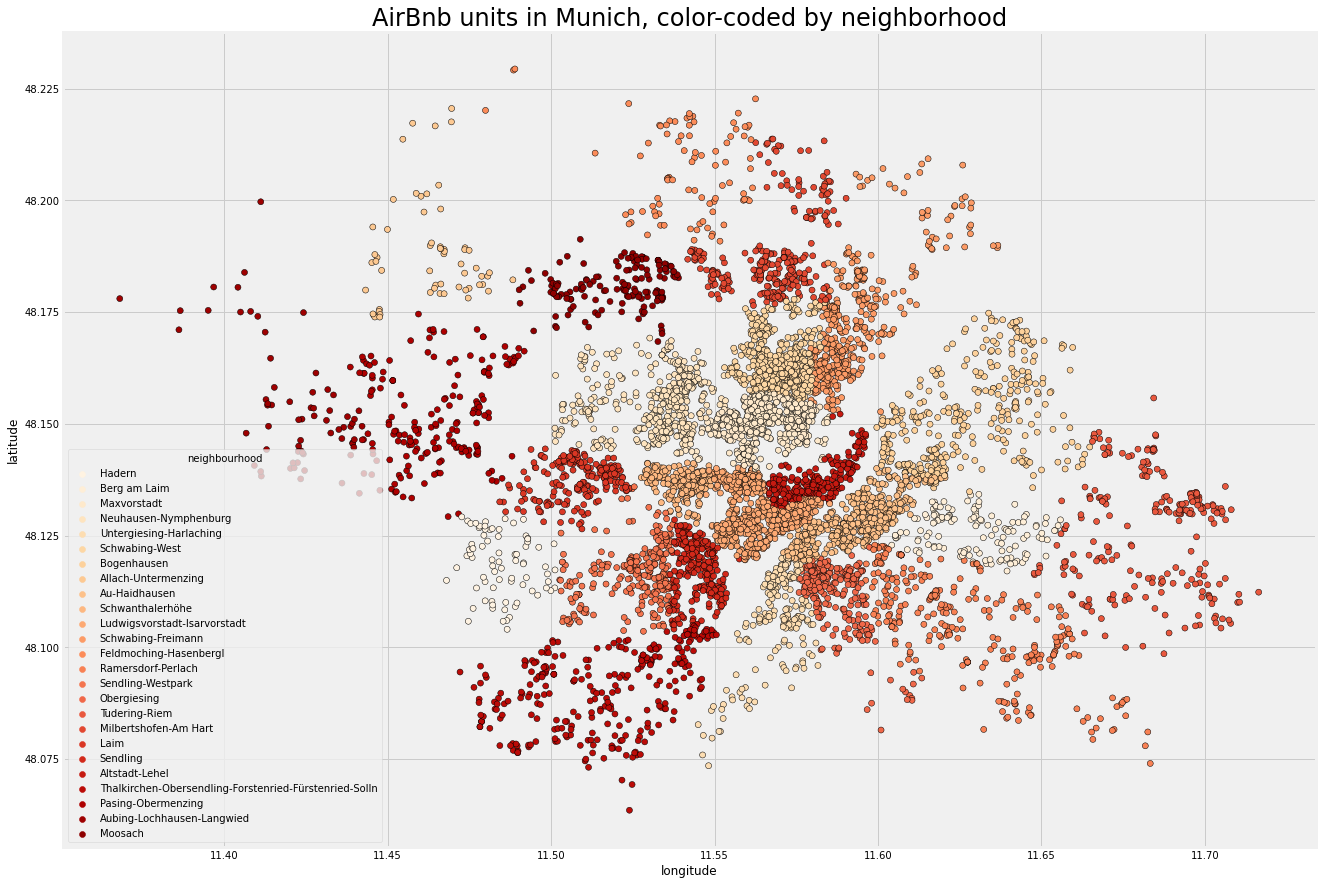

In [11]:
title = 'AirBnb units in Munich, color-coded by neighborhood'
plt.figure(figsize=(20,15))
sns.set_palette("OrRd")
sns.scatterplot(master_df_munich_unique.longitude, master_df_munich_unique.latitude, hue = master_df_munich_unique.neighbourhood, palette='OrRd', edgecolor='black').set_title(title, fontsize=24)
plt.savefig('airbnb_unit_munich.png')
plt.show()

## Add review data through a join

In [12]:
df_reviews = pd.concat([munich_raw_df_10_6_2021,raw_df_munich],axis=1, join='outer')
df_reviews_ = df_reviews.loc[:,~df_reviews.columns.duplicated()]
df_reviews_

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,97945,Deluxw-Apartm. with roof terrace,517685,Angelika,NaN,Hadern,48.114920,11.489540,Entire home/apt,80,...,4.89,4.82,4.90,4.93,4.78,4.73,f,2,0,0
1,114695,Apartment Munich/East with sundeck,581737,Stephan,NaN,Berg am Laim,48.120710,11.637580,Entire home/apt,95,...,4.71,4.96,4.96,5.00,4.55,4.60,f,2,0,0
2,127383,City apartment next to Pinakothek,630556,Sonja,NaN,Maxvorstadt,48.151990,11.564820,Entire home/apt,99,...,4.92,4.80,4.98,4.96,4.91,4.82,f,1,0,0
3,159634,"Fancy, bright central roof top flat and homeoffice",765694,Sanna,NaN,Pasing-Obermenzing,48.138550,11.465860,Entire home/apt,52,...,4.75,4.25,4.72,4.75,4.50,4.34,t,1,0,0
4,170154,"Own floor & bath, parking & breakfast",108297,Alex,NaN,Sendling-Westpark,48.108140,11.527330,Private room,55,...,4.95,4.98,4.99,4.98,4.76,4.90,f,0,1,0
5,170815,Your own flat near central station!,814793,Inge,NaN,Neuhausen-Nymphenburg,48.160710,11.543140,Entire home/apt,65,...,4.61,4.50,4.83,4.75,4.53,4.46,f,1,0,0
6,172672,Cozy guest room in high-end flat.,823913,Karin,NaN,Schwabing-West,48.163410,11.563660,Private room,49,...,4.90,4.82,4.98,4.91,4.85,4.75,f,1,1,0
7,179640,GREEN OASIS near center & tradefair,860212,Ingrid,NaN,Bogenhausen,48.144530,11.637690,Private room,35,...,4.72,4.54,4.82,4.86,4.54,4.54,f,0,1,0
8,183634,munich all-inclusive camping,880705,Toby,NaN,Allach-Untermenzing,48.175320,11.445260,Shared room,50,...,NaN,NaN,NaN,NaN,NaN,NaN,f,0,0,1
9,186596,2-room-flat in central location,910486,Hatice,NaN,Au-Haidhausen,48.120080,11.577250,Shared room,82,...,4.75,4.76,4.88,4.85,4.75,4.53,f,1,3,1


## Regression

In [13]:
#df_reviews_.columns

In [14]:
df_regression = df_reviews_.copy()
df_regression_ = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_ = df_regression_[df_regression_['beds'].notna()]
df_regression_ = df_regression_[df_regression_['bedrooms'].notna()]
df_regression_['price'] = pd.to_numeric(df_regression_['price'])
df_regression_.isna().sum()

df_regression_=df_regression_.fillna(df_regression_.mean())

In [15]:
X_ = df_regression_[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y = df_regression_['price'].replace({'\$':''}, regex = True)
Y = y.replace({',':''}, regex=True)

# with sklearn
regr = LinearRegression()
regr.fit(X_, Y)

print('Intercept: ', regr.intercept_)
print('Coefficients: ', regr.coef_)

print (regr)

Intercept:  -214.26651139710526
Coefficients:  [ 23.14958161  53.02407964   7.57620225   0.44805443   1.15233289
  13.2370773   35.67921886  62.50341772 -77.33180712]
LinearRegression()


In [16]:
y_pred2 = regr.predict(X_)

In [17]:
df_mult= pd.DataFrame({'Actual': Y, 'Predicted': y_pred2.flatten()})
df_mult['Diff'] = df_mult['Predicted'] - df_mult['Actual']
df_mult_sort = df_mult.sort_values(by=['Diff'])
#df_result = (df_mult_sort[df_mult_sort['Actual'] >=75]) && (df_mult_sort[df_mult_sort['Actual'] <=300])
df_result = df_mult_sort.query('Actual >= 75 & Actual <= 400')
df_result.head()

,Actual,Predicted,Diff
2040,400,70.343431,-329.656569
3128,373,80.971263,-292.028737
2465,400,108.967997,-291.032003
1863,400,110.542856,-289.457144
3861,360,70.666011,-289.333989


<function matplotlib.pyplot.ylim(*args, **kwargs)>

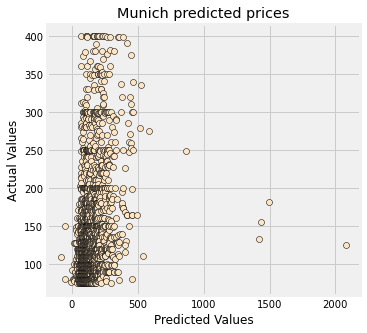

In [18]:
x = df_result['Predicted']
y = df_result['Actual']
plt.figure(figsize=(5,5))
plt.title('')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Munich predicted prices')
plt.scatter(x,y, edgecolor='black')
plt.ylim